# Study H1 ~ H50

In [19]:
%load_ext autoreload
%autoreload 2
PROJ_HOME='/Users/skeem/Projects/analyst_performance/'
import sys
sys.path.append(PROJ_HOME)
from datetime import datetime
from pathlib import Path
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pickle
from tqdm import tqdm

In [21]:
import spacy
#from spacytextblob.spacytextblob import SpacyTextBlob
#from googletrans import Translator

In [36]:
from arum.preprocessing import fix_price, get_author_production, clean_recommendations, change_col_names, build_labels
from arum.preprocessing import check_report_date, group_by_month
from arum.lookups.column_names import new_col_names

In [109]:
plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (16,4)

In [23]:
data_dir = Path(PROJ_HOME+'/data')

In [24]:
nlp = spacy.load("ko_core_news_lg")

In [25]:
#translator = Translator(service_urls=[
#      'translate.google.com',
#      'translate.google.co.kr',
#    ])

In [34]:
merged_df

,author,source,ticker_symbol,company,report_date,report_date-1,report_date-2,report_title,opening,closing,high,closing_1,closing_2,recommendation,H25,H50,A1,A2,A3,average
0,황현준,DB금융,A035420,NAVER,2020-01-14,2020-01-13,2020-01-10,앞으로가 중요하다,188000,190500,194500,188000,188000,BUY,194500,194500,0.000000,0.034574,0.013298,0.015957
1,황현준,DB금융,A034230,파라다이스,2020-01-16,2020-01-15,2020-01-14,4Q19 호실적 예상,21550,21800,21850,21600,21500,BUY,22000,22000,-0.002315,0.013921,0.011601,0.007736
2,황현준,DB금융,A039130,하나투어,2020-01-21,2020-01-20,2020-01-17,하반기를 기대,51284,50796,51968,52066,55094,BUY,51968,51968,-0.015019,0.013337,-0.009516,-0.003733
3,황현준,DB금융,A035720,카카오,2020-01-23,2020-01-22,2020-01-21,톡비즈보드가 실적 견인,33600,33100,33600,33200,33000,BUY,38300,38300,0.012048,0.000000,-0.014881,-0.000944
4,황현준,DB금융,A263750,펄어비스,2020-01-28,2020-01-23,2020-01-22,20년 하반기에 주목,37440,37100,38000,38660,36660,BUY,39200,39620,-0.031557,0.014957,-0.009081,-0.008560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63242,강경근,NH,A032540,TJ미디어,2022-08-04,2022-08-03,2022-08-02,가무의 민족,6510,6480,6890,6330,6320,NR,6890,7120,0.028436,0.058372,-0.004608,0.027400
63243,강경근,NH,A352940,인바이오,2022-08-31,2022-08-30,2022-08-29,"제네릭, 친환경 제품으로 성장 동력 확보",6040,5960,6040,6020,6050,NR,6040,6040,0.003322,0.000000,-0.013245,-0.003308
63244,강경근,NH,A277810,레인보우로보틱스,2022-09-02,2022-09-01,2022-08-31,내가 로봇 대장주가 될 상인가?,29900,30100,31300,29100,30800,NR,39200,39200,0.027491,0.046823,0.006689,0.027001
63245,강경근,NH,A294570,쿠콘,2022-11-16,2022-11-15,2022-11-14,금융 플랫폼 서비스 활성화 수혜,30300,31250,31500,29750,29000,NR,32500,35750,0.018487,0.039604,0.031353,0.029815


# Preprocessing

In [26]:
#sentiment_df = pd.read_pickle(PROJ_HOME+'/data/sentiment_pub_trade.pkl')
merged_df = pd.read_pickle(PROJ_HOME+'/data/merged.pkl')

In [27]:
author_freq = get_author_production(merged_df)

In [28]:
clean_recommendations(merged_df)

{'BUY': 49627,
 'NR': 10147,
 'HOLD': 3317,
 'STRONG_BUY': 152,
 'SELL': 3,
 'REDUCE': 1}

In [32]:
merged_df.drop(['index', 'Unnamed: 0'], inplace=True, axis=1)

In [30]:
#change_col_names(sentiment_df)

In [37]:
for colnm in list(new_col_names.values()):
    print(colnm)
    merged_df = fix_price(merged_df, colnm)

report_date-1
report_date-2
high
closing
opening
closing_1
closing_2


In [38]:
merged_df = fix_price(merged_df, 'H25')
merged_df = fix_price(merged_df, 'H50')

In [41]:
merged_df['report_date-2'].value_counts()

report_date-2
2020-05-14    330
2021-11-11    291
2020-08-13    285
2021-10-27    273
2021-05-13    257
             ... 
2022-09-14     19
2020-12-23     18
2022-12-23     16
2022-12-27     15
2020-12-24     12
Name: count, Length: 741, dtype: int64

In [42]:
#merged_df['report_date-2'].fillna('', inplace=True)

In [44]:
merged_df = check_report_date(merged_df)

In [46]:
# Sanity Check.  cnt_no should be 0
cnt_yes = 0
cnt_no = 0
for k, r in merged_df.iterrows():
    if type(r['report_date']) == datetime:
        cnt_yes += 1
    else:
        cnt_no += 1
print(cnt_yes, cnt_no)

0 63247


In [47]:
type(r['report_date'])

pandas._libs.tslibs.timestamps.Timestamp

# Labeling

In [49]:
labeled_df = build_labels(merged_df)

In [50]:
labeled_df

,author,source,ticker_symbol,company,report_date,report_date-1,report_date-2,report_title,opening,closing,...,A2,A3,average,report_month,__label1,__label2,__label3,gap_up_ratio,high_profit_ratio,closing_profit_ratio
0,황현준,DB금융,A035420,NAVER,2020-01-14,2020-01-13,2020-01-10,앞으로가 중요하다,188000,190500,...,0.034574,0.013298,0.015957,202001,0,1,1,0.000000,0.034574,0.013298
1,황현준,DB금융,A034230,파라다이스,2020-01-16,2020-01-15,2020-01-14,4Q19 호실적 예상,21550,21800,...,0.013921,0.011601,0.007736,202001,0,1,1,-0.002315,0.013921,0.011601
2,황현준,DB금융,A039130,하나투어,2020-01-21,2020-01-20,2020-01-17,하반기를 기대,51284,50796,...,0.013337,-0.009516,-0.003733,202001,0,1,0,-0.015019,0.013337,-0.009516
3,황현준,DB금융,A035720,카카오,2020-01-23,2020-01-22,2020-01-21,톡비즈보드가 실적 견인,33600,33100,...,0.000000,-0.014881,-0.000944,202001,1,0,0,0.012048,0.000000,-0.014881
4,황현준,DB금융,A263750,펄어비스,2020-01-28,2020-01-23,2020-01-22,20년 하반기에 주목,37440,37100,...,0.014957,-0.009081,-0.008560,202001,0,1,0,-0.031557,0.014957,-0.009081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63242,강경근,NH,A032540,TJ미디어,2022-08-04,2022-08-03,2022-08-02,가무의 민족,6510,6480,...,0.058372,-0.004608,0.027400,202208,1,1,0,0.028436,0.058372,-0.004608
63243,강경근,NH,A352940,인바이오,2022-08-31,2022-08-30,2022-08-29,"제네릭, 친환경 제품으로 성장 동력 확보",6040,5960,...,0.000000,-0.013245,-0.003308,202208,1,0,0,0.003322,0.000000,-0.013245
63244,강경근,NH,A277810,레인보우로보틱스,2022-09-02,2022-09-01,2022-08-31,내가 로봇 대장주가 될 상인가?,29900,30100,...,0.046823,0.006689,0.027001,202209,1,1,1,0.027491,0.046823,0.006689
63245,강경근,NH,A294570,쿠콘,2022-11-16,2022-11-15,2022-11-14,금융 플랫폼 서비스 활성화 수혜,30300,31250,...,0.039604,0.031353,0.029815,202211,1,1,1,0.018487,0.039604,0.031353


In [51]:
labeled_df.shape

(63247, 27)

In [52]:
valid_df = labeled_df.query('gap_up_ratio > -1 and high_profit_ratio > -1 and closing_profit_ratio > -1').copy()
valid_df.shape

(63247, 27)

# Derivatives

In [53]:
valid_df.keys()

Index(['author', 'source', 'ticker_symbol', 'company', 'report_date',
       'report_date-1', 'report_date-2', 'report_title', 'opening', 'closing',
       'high', 'closing_1', 'closing_2', 'recommendation', 'H25', 'H50', 'A1',
       'A2', 'A3', 'average', 'report_month', '__label1', '__label2',
       '__label3', 'gap_up_ratio', 'high_profit_ratio',
       'closing_profit_ratio'],
      dtype='object')

In [55]:
hi_col_names = ['H25', 'H50']

In [57]:
first_time_down = []
first_time_delta = []
high_prefix = 'high_'
for k, d in valid_df.iterrows():
    high_val = d['high']
    for i in hi_col_names:
        if high_val > d[i]:
            first_time_down.append(i)
            first_time_delta.append( (high_val - d[i])/high_val )
            break 
        if i == 'H50':
            first_time_down.append(50)
            first_time_delta.append( (high_val - d[i])/high_val )
len(first_time_down)

63247

In [58]:
valid_df['1st_time_down'] = first_time_down
valid_df['1st_time_delta'] = first_time_delta

In [59]:
valid_df.groupby('author').count()

,source,ticker_symbol,company,report_date,report_date-1,report_date-2,report_title,opening,closing,high,...,average,report_month,__label1,__label2,__label3,gap_up_ratio,high_profit_ratio,closing_profit_ratio,1st_time_down,1st_time_delta
author,,,,,,,,,,,,,,,,,,,,,
강경근,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
강경태,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
강동근,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
강동진,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
강석오,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
황성환,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
황승택,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
황어연,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177


In [73]:
longterm_df = valid_df[['author', 'high_profit_ratio', '1st_time_down', '1st_time_delta']].groupby('author').mean().sort_values(
    ['1st_time_delta'], ascending=True).copy()

In [74]:
longterm_df = pd.concat([valid_df.groupby('author').count()[['source']].copy(), longterm_df], axis=1)

In [75]:
longterm_df.sort_values(['1st_time_delta'], ascending=True, inplace=True)

In [78]:
longterm_df.query('source > 10')

,source,high_profit_ratio,1st_time_down,1st_time_delta
author,,,,
유욱재,15,0.060210,50.0,-1.322072
김태엽,14,0.055462,50.0,-0.545519
오병용,67,0.048715,50.0,-0.510427
전상용,19,0.057200,50.0,-0.467194
고문영,23,0.036467,50.0,-0.463133
...,...,...,...,...
이남석,23,0.018844,50.0,-0.055588
김아람,18,0.016771,50.0,-0.050081
신윤철,60,0.014441,50.0,-0.042409


In [77]:
longterm_df.shape

(590, 4)

In [79]:
longterm_df.to_excel(data_dir/'longterm_high.xls')

In [82]:
tmp = 1

In [84]:
longterm_df.loc[longterm_df['1st_time_down']< 50]

,source,high_profit_ratio,1st_time_down,1st_time_delta
author,,,,


In [85]:
valid_df['__label1'].value_counts()

__label1
1    37508
0    25739
Name: count, dtype: int64

In [86]:
valid_df['__label2'].value_counts()

__label2
1    57456
0     5791
Name: count, dtype: int64

In [87]:
valid_df['__label3'].value_counts()

__label3
0    34850
1    28397
Name: count, dtype: int64

In [90]:
 valid_df['__label4'] = valid_df.apply(lambda x: 1 if x.__label1 and x.__label3 else 0, axis=1)

In [92]:
long_top5 = ['유욱재', 
'김태엽',
'오병용',
'전상용',
'고문영']
long_bot5 = ['이남석',
'김아람',
'신윤철',
'최윤희',
'임수연',
]

In [95]:
compare_df = valid_df.loc[valid_df['author'].isin(long_top5+long_bot5)][['author', 'report_date', 'A1']]

In [100]:
by_author_df = valid_df[['author', 'report_date', 'A1', 'A2','A3']].groupby(['author', 'report_date']).mean()

In [98]:
compare_df.loc[compare_df['author']=='유욱재']

,author,report_date,A1
9713,유욱재,2020-07-30,0.011111
9714,유욱재,2020-08-11,0.019560
9715,유욱재,2020-08-27,0.011029
9716,유욱재,2020-08-27,0.013528
9717,유욱재,2020-09-14,0.031847
9718,유욱재,2020-10-28,0.021157
9719,유욱재,2020-11-06,0.003356
9720,유욱재,2020-11-26,0.018957
9721,유욱재,2020-11-26,0.005089
9722,유욱재,2020-11-27,0.003895


In [104]:
by_author_df = by_author_df.reset_index()
by_author_df

,author,report_date,A1,A2,A3
0,강경근,2020-04-20,0.017094,0.056723,0.029412
1,강경근,2020-06-02,0.006829,0.017372,-0.002860
2,강경근,2020-06-08,0.021277,0.098958,0.015625
3,강경근,2020-09-08,0.003424,0.018750,-0.025556
4,강경근,2020-09-28,0.045114,0.037883,0.021038
...,...,...,...,...,...
40466,황현준,2022-11-10,-0.023068,0.001181,-0.061393
40467,황현준,2022-11-11,0.052083,0.123762,0.123762
40468,황현준,2022-11-14,-0.032840,0.001273,-0.068497
40469,황현준,2022-11-15,0.013678,0.025487,0.020990


In [130]:
a123_stats = by_author_df[['A1', 'A2', 'A3']].describe().to_dict()

In [136]:
two_sigma = a123_stats['A1']['std']*2
top_2sigma = a123_stats['A1']['mean']+two_sigma
bot_2sigma = a123_stats['A1']['mean']-two_sigma
top_2sigma, bot_2sigma

(0.05111087670432543, -0.03827747543427189)

In [132]:
top_performers = by_author_df.loc[by_author_df['A1']>top_2sigma]
top_performers

,author,report_date,A1,A2,A3
11,강경근,2021-07-06,0.140389,0.138258,0.041667
13,강경근,2021-08-05,0.080386,0.008929,-0.026786
15,강경근,2021-08-24,0.051163,0.066372,-0.011062
48,강경근,2022-12-29,0.061983,0.000000,-0.050584
84,강경태,2021-12-29,0.057416,0.180995,0.095023
...,...,...,...,...,...
40168,황어연,2020-08-07,0.132597,0.021892,-0.068319
40272,황유식,2020-03-27,0.069070,0.022472,-0.025279
40391,황현준,2020-12-03,0.175932,0.067624,-0.096948
40450,황현준,2022-05-17,0.058728,0.077042,0.058552


In [135]:
top_performers['author'].value_counts()[:10]

author
최재호    31
이동건    16
이동욱    15
김두현    14
선민정    13
김재윤    12
윤재성    11
허혜민    11
김홍식    11
최성환    10
Name: count, dtype: int64

In [137]:
bot_performers = by_author_df.loc[by_author_df['A1']<bot_2sigma]
bot_performers

,author,report_date,A1,A2,A3
158,강동진,2020-03-23,-0.084404,0.148297,0.074148
166,강동진,2020-04-28,-0.040559,0.024781,0.001458
176,강동진,2020-06-12,-0.058185,0.138245,0.088239
420,강성진,2020-06-12,-0.044000,0.020921,-0.010460
733,강하나,2021-11-15,-0.041667,0.004348,-0.073913
...,...,...,...,...,...
40063,황성환,2022-02-22,-0.046732,0.046853,0.025533
40144,황어연,2020-01-28,-0.049689,0.016340,-0.019608
40166,황어연,2020-08-03,-0.041993,0.011105,-0.020066
40211,황어연,2021-05-06,-0.209483,0.134289,0.059977


In [139]:
bot_performers['author'].value_counts()[:10]

author
오동환    8
서근희    7
박신애    7
오린아    6
배송이    6
김혜미    6
김현용    6
박은경    6
안지영    5
엄경아    5
Name: count, dtype: int64

## Distributions A1, A2, A3

array([[<AxesSubplot:title={'center':'A1'}>]], dtype=object)

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


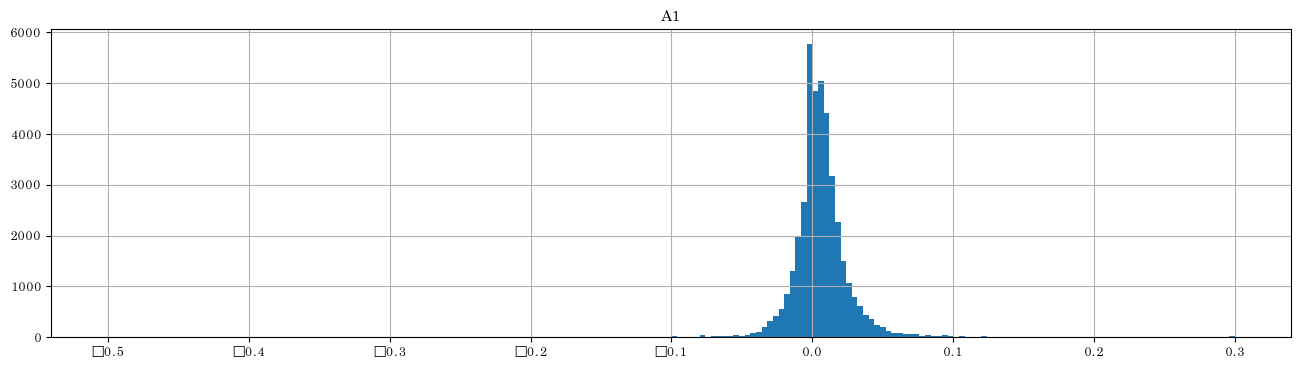

In [121]:
by_author_df[['A1']].hist(bins=200)

array([[<AxesSubplot:title={'center':'A1'}>]], dtype=object)

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


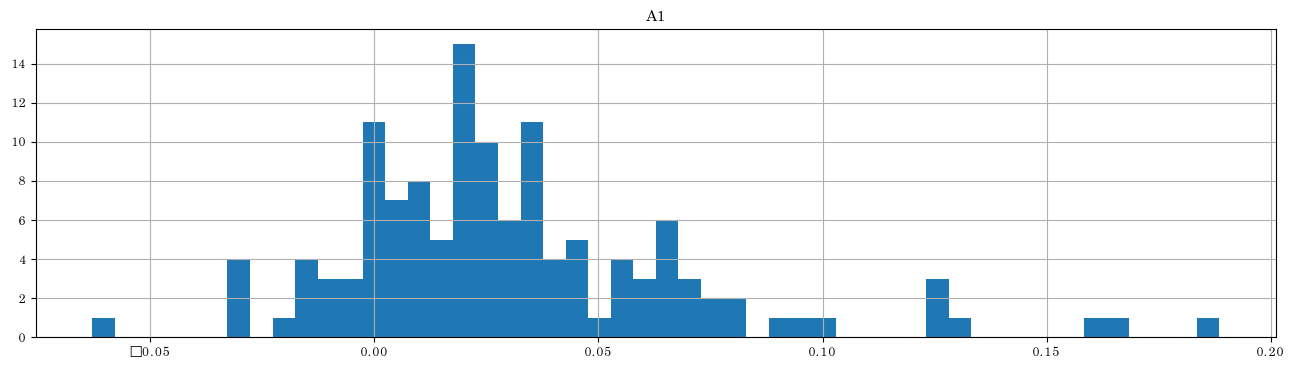

array([[<AxesSubplot:title={'center':'A1'}>]], dtype=object)

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


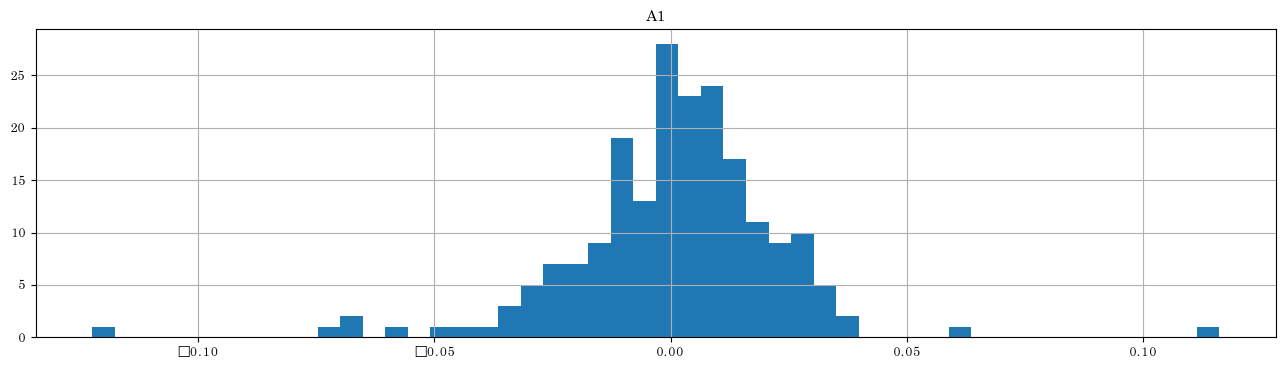

In [145]:
by_author_df.loc[by_author_df['author']=='오동환'][['A1']].hist(bins=50)

In [172]:
analyst1 = by_author_df.loc[by_author_df['author']=='최재호'][['A1']].to_numpy().flatten()
analyst2 = by_author_df.loc[by_author_df['author']=='오동환'][['A1']].to_numpy().flatten()
comp_df = pd.DataFrame([analyst1, analyst2]).transpose()
comp_df.columns = ['최재호', '오동환']

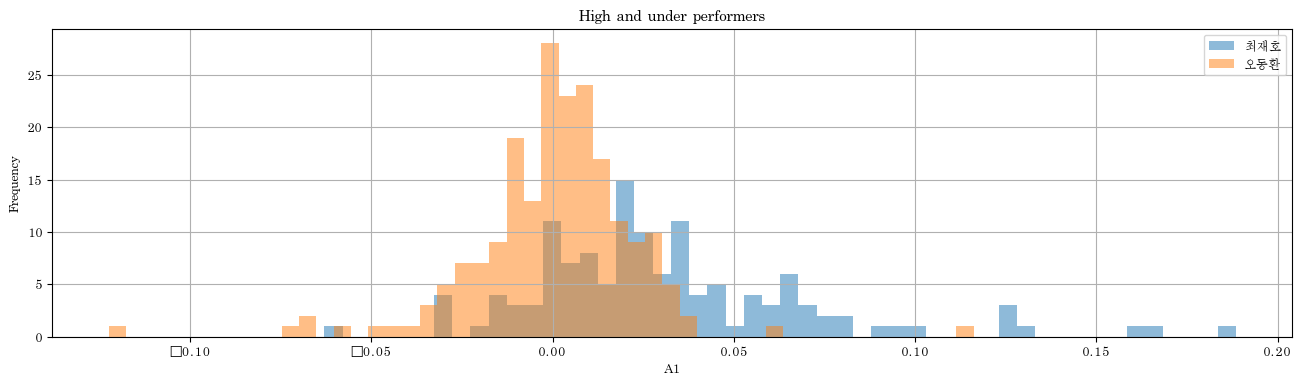

In [182]:
comp_df['최재호'].hist(alpha=0.5,bins=50, legend=True)
comp_df['오동환'].hist(alpha=0.5,bins=50, legend=True)
plt.legend()
plt.title('High and under performers')
plt.xlabel('A1')
plt.ylabel('Frequency')
# Show plot
plt.show()

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


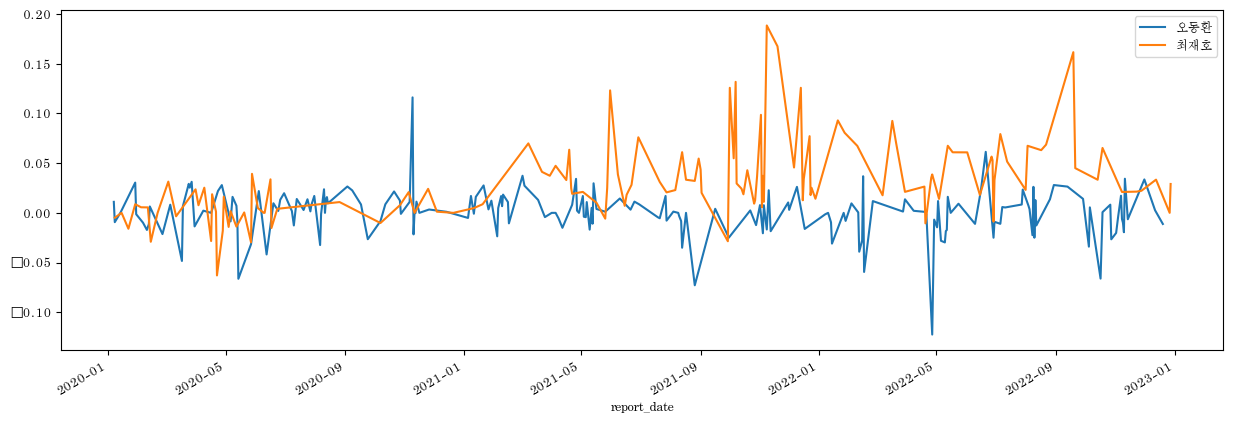

In [146]:
cnt = 0
fig, ax = plt.subplots()
leg = []
top_performers = ['오동환', '최재호']
for auth in top_performers[:5]:
    #leg.append(translator.translate(auth , src="ko", dest="en").text)
    leg.append(auth)
    tmp_df = by_author_df.loc[by_author_df['author'] == auth]
    tmp_df.set_index('report_date')['A1'].plot.line(legend=True, figsize=(15,5), ax=ax).invert_yaxis()
    cnt += 1
    #ax.set_xticklabels(list(valid_df['report_month'].unique()))
    ax.legend(leg)
    if cnt > 10:
        break

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


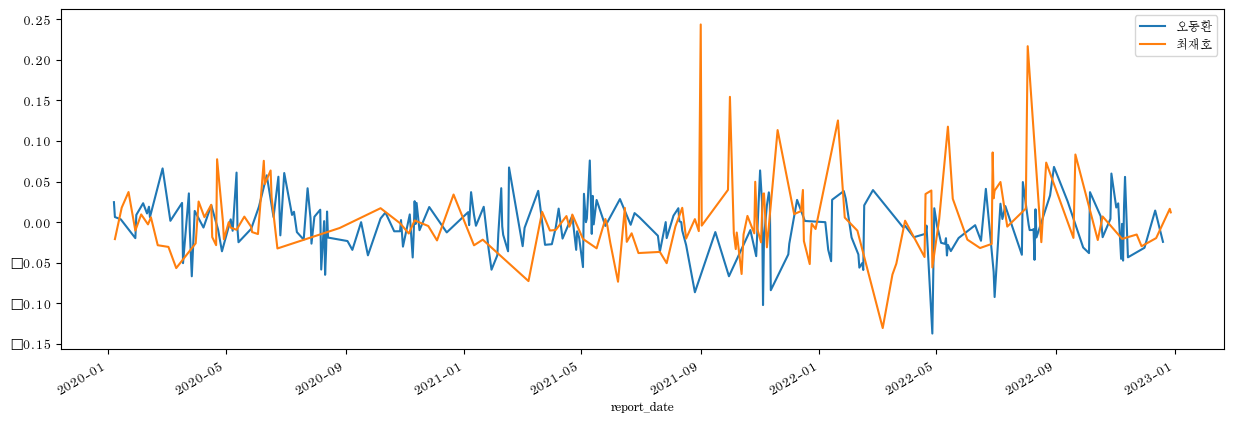

In [148]:
cnt = 0
fig, ax = plt.subplots()
leg = []
top_performers = ['오동환', '최재호']
for auth in top_performers[:5]:
    #leg.append(translator.translate(auth , src="ko", dest="en").text)
    leg.append(auth)
    tmp_df = by_author_df.loc[by_author_df['author'] == auth]
    tmp_df.set_index('report_date')['A3'].plot.line(legend=True, figsize=(15,5), ax=ax).invert_yaxis()
    cnt += 1
    #ax.set_xticklabels(list(valid_df['report_month'].unique()))
    ax.legend(leg)
    if cnt > 10:
        break

array([[<AxesSubplot:title={'center':'A2'}>]], dtype=object)

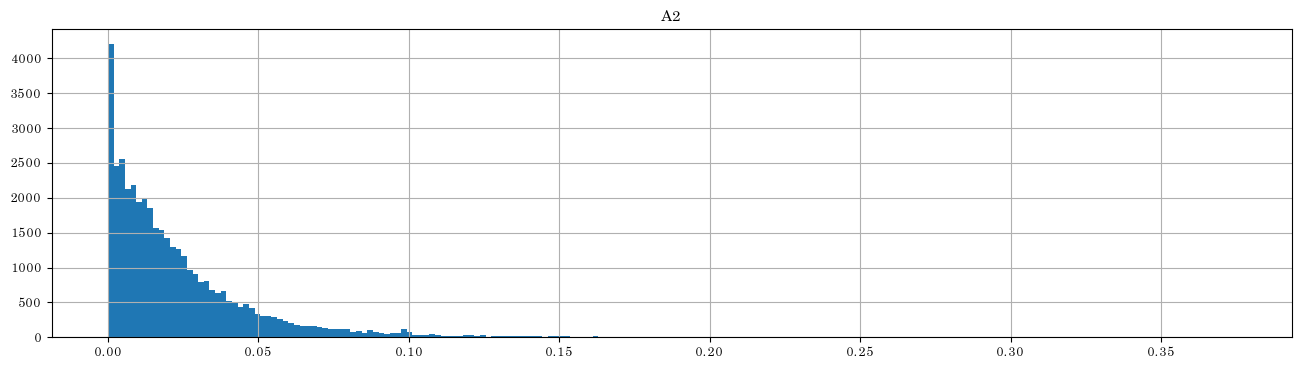

In [122]:
by_author_df[['A2']].hist(bins=200)

array([[<AxesSubplot:title={'center':'A3'}>]], dtype=object)

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


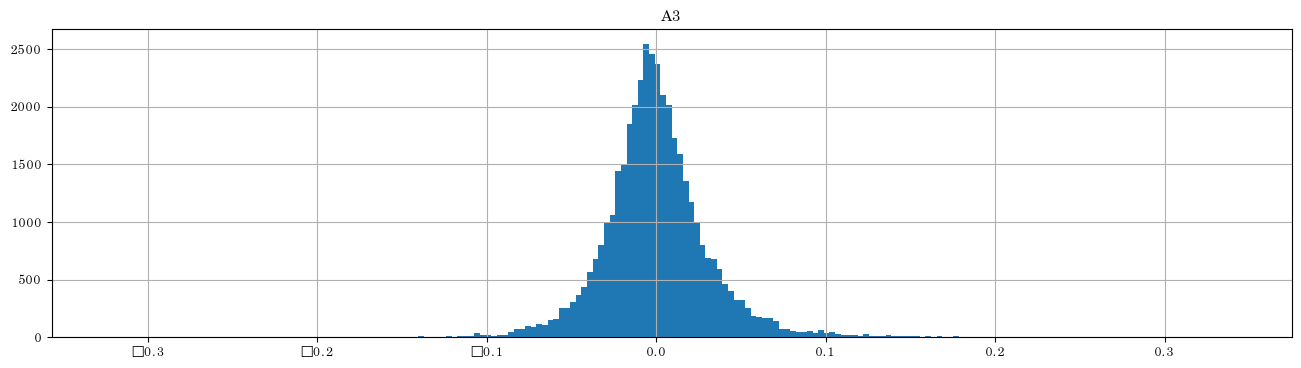

In [123]:
by_author_df[['A3']].hist(bins=200)

In [105]:
authors = by_author_df['author'].value_counts().to_dict()
authors.keys()

dict_keys(['박종선', '김장열', '김현용', '성종화', '하태기', '김경민', '김지산', '김동원', '이동욱', '정홍식', '박강호', '박종렬', '안재민', '김회재', '김홍식', '박신애', '오동환', '유재선', '강동진', '허혜민', '최민하', '양지환', '남성현', '이동헌', '이동건', '이상헌', '김현태', '박상준', '임은영', '박성봉', '유정현', '강성진', '정호윤', '김진우', '백영찬', '박세라', '권성률', '조현렬', '백재승', '최종경', '한병화', '정혜진', '김세련', '송선재', '최고운', '이상현', '어규진', '김혜미', '박혜진', '한유정', '오린아', '조미진', '서근희', '박은정', '송유림', '이화정', '전배승', '유지웅', '김인', '이기훈', '최정욱', '심은주', '김동하', '이종형', '정태준', '노우호', '이남수', '김소혜', '정동익', '홍세종', '김명주', '박성순', '오강호', '장문수', '박은경', '박유악', '이승훈', '김동양', '이진명', '하누리', '신은정', '박형우', '김현수', '이경자', '방민진', '배송이', '이동륜', '김록호', '류제현', '황성진', '강승건', '주영훈', '정용진', '김기룡', '이선화', '김장원', '김운호', '이민재', '장문준', '고의영', '문경원', '최재호', '윤재성', '조상훈', '전우제', '김진상', '박현욱', '안지영', '최관순', '장정훈', '이문종', '백두산', '김한이', '안주원', '박현진', '정원석', '성현동', '이종원', '임희연', '황현준', '한경래', '최도연', '김충현', '정연승', '이규하', '조철희', '이순학', '이경신', '김평모', '김도하', '김두현', '이민희', '황어연', '남효지', '김소원', '김정환', '김태현', '한상원', '정준섭', '신수연', '이진협', '이창

In [113]:
 by_author_df.loc[by_author_df['author'].isin([
        '박종선', '김장열', '김현용', '성종화', '하태기', '김경민', '김지산', '김동원', '이동욱', '정홍식', '박강호', '박종렬'])
                    ].set_index('report_date')[['A1']]

,A1
report_date,
2020-01-02,-0.005376
2020-01-09,0.028169
2020-01-15,-0.008772
2020-01-21,0.004310
2020-01-23,0.016824
...,...
2022-12-02,0.000859
2022-12-08,0.011080
2022-12-09,0.012821


In [ ]:
by_author_df.sort_values(A1)

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


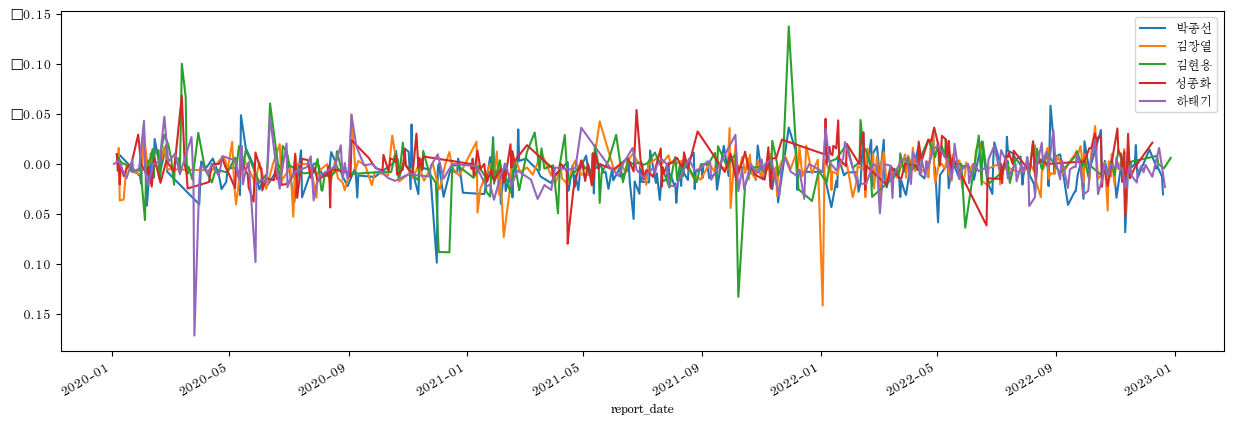

In [117]:
cnt = 0
fig, ax = plt.subplots()
leg = []
top_performers = ['박종선', '김장열', '김현용', '성종화', '하태기', '김경민', '김지산', '김동원', '이동욱', '정홍식', '박강호', '박종렬']
for auth in top_performers[:5]:
    #leg.append(translator.translate(auth , src="ko", dest="en").text)
    leg.append(auth)
    tmp_df = by_author_df.loc[by_author_df['author'] == auth]
    tmp_df.set_index('report_date')['A1'].plot.line(legend=True, figsize=(15,5), ax=ax).invert_yaxis()
    cnt += 1
    #ax.set_xticklabels(list(valid_df['report_month'].unique()))
    ax.legend(leg)
    if cnt > 10:
        break

/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/skeem/base10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


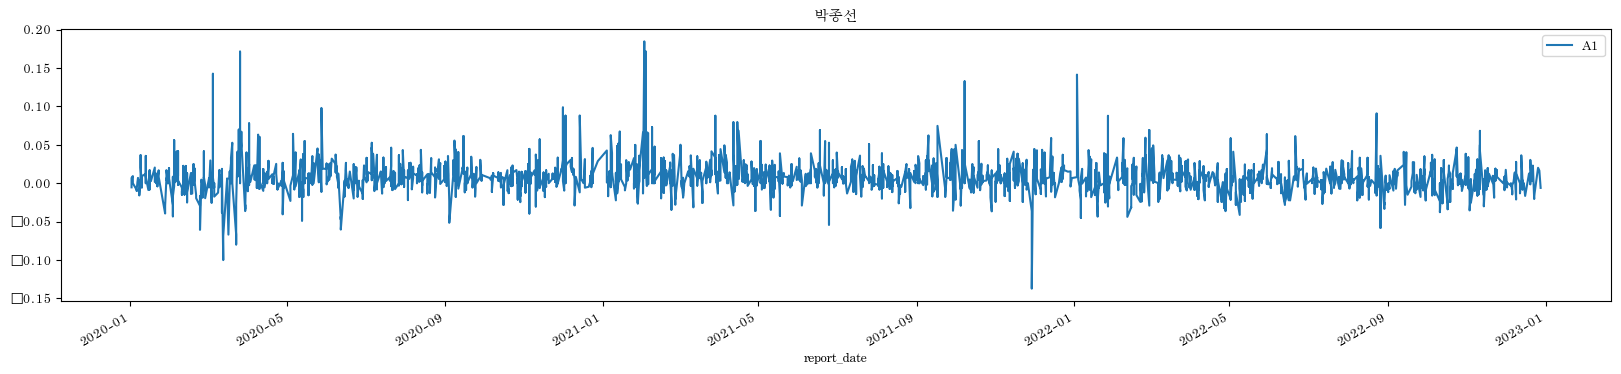

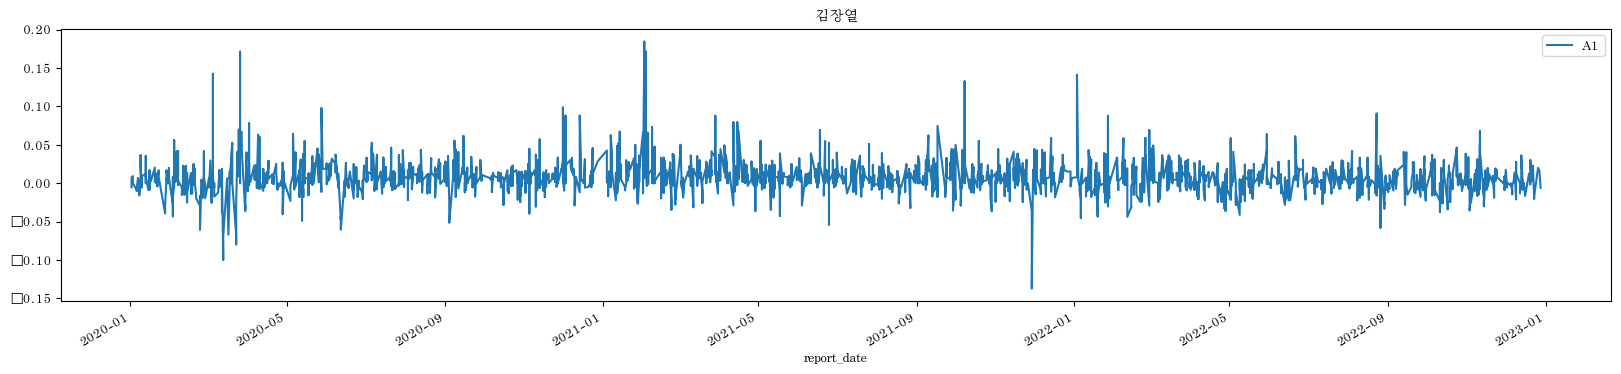

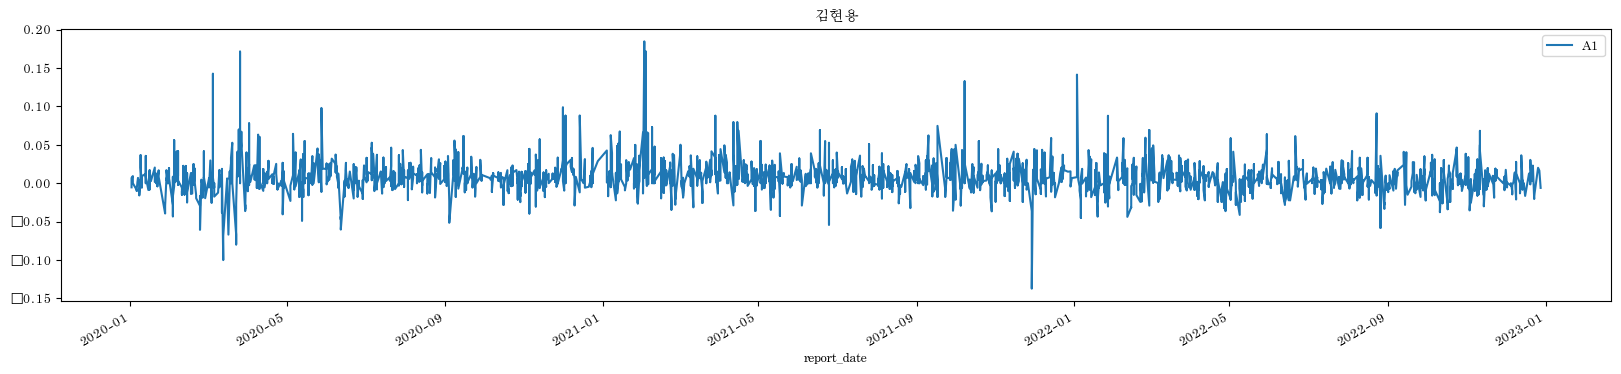

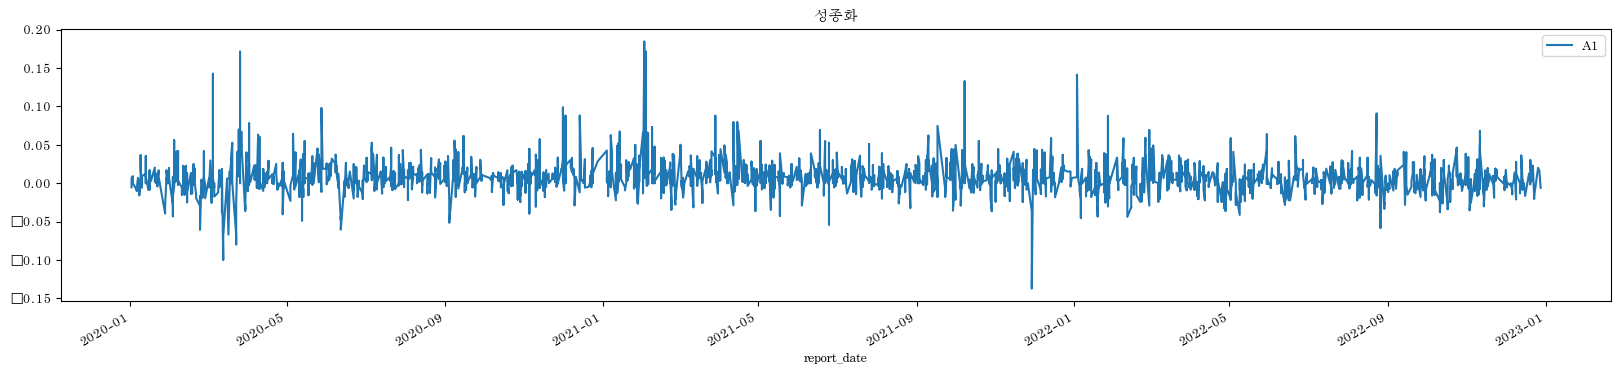

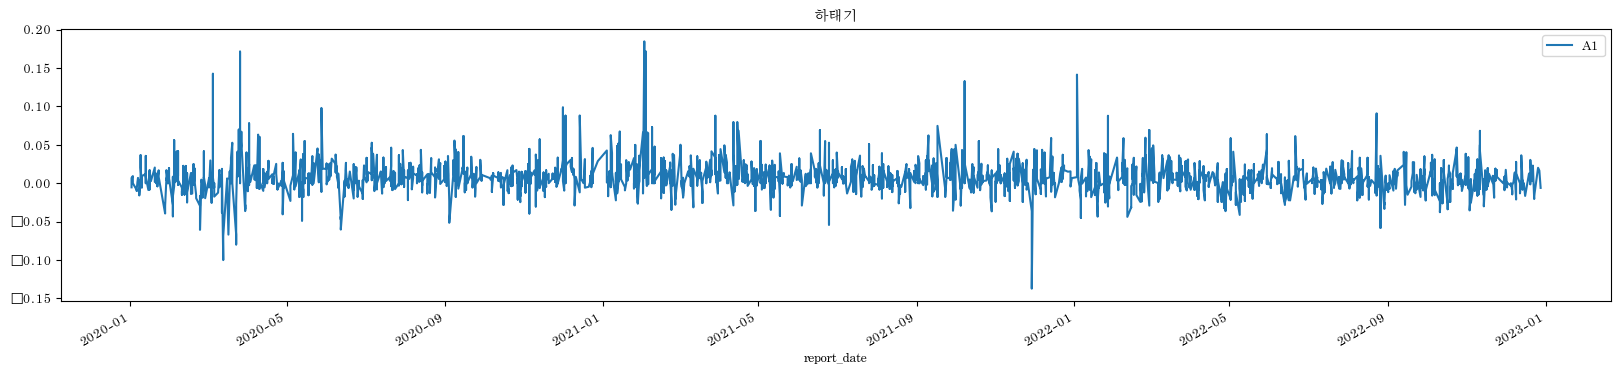

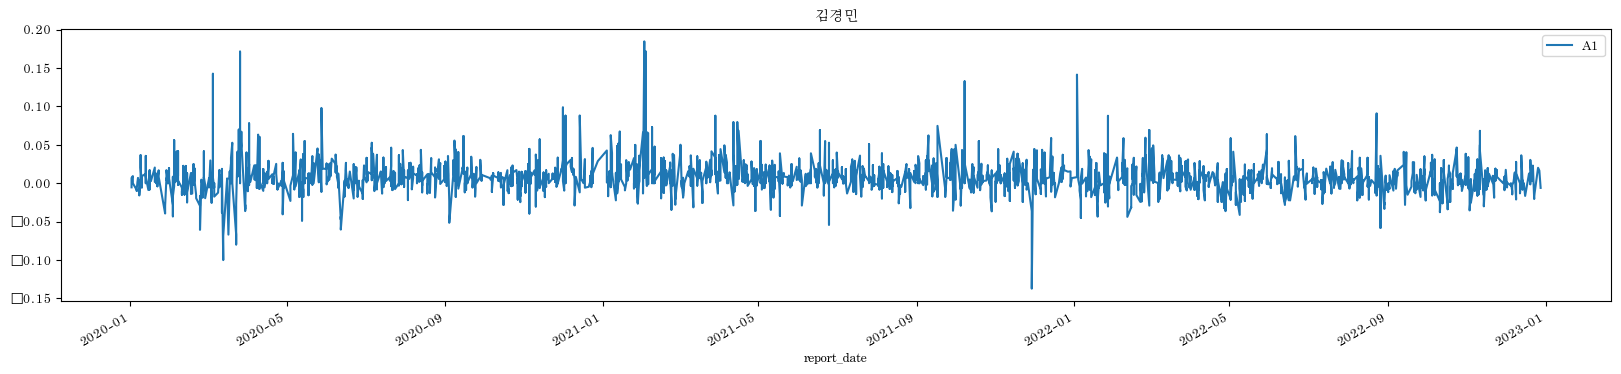

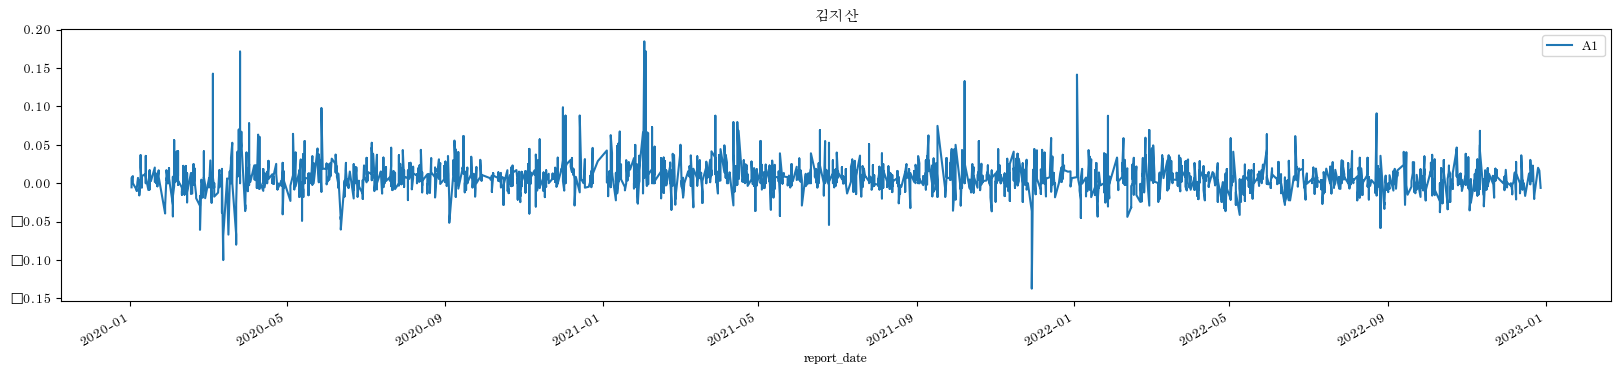

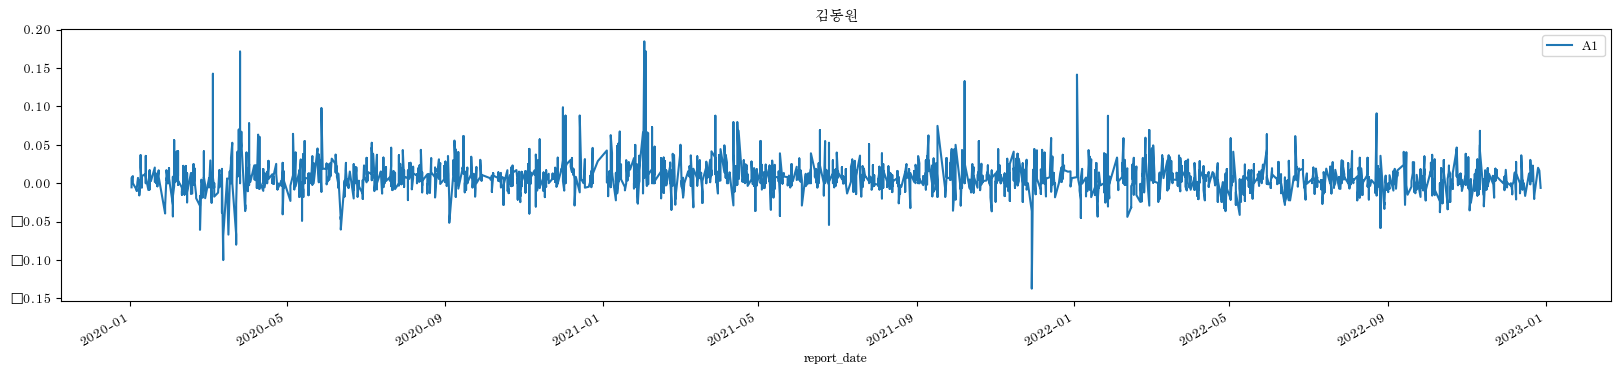

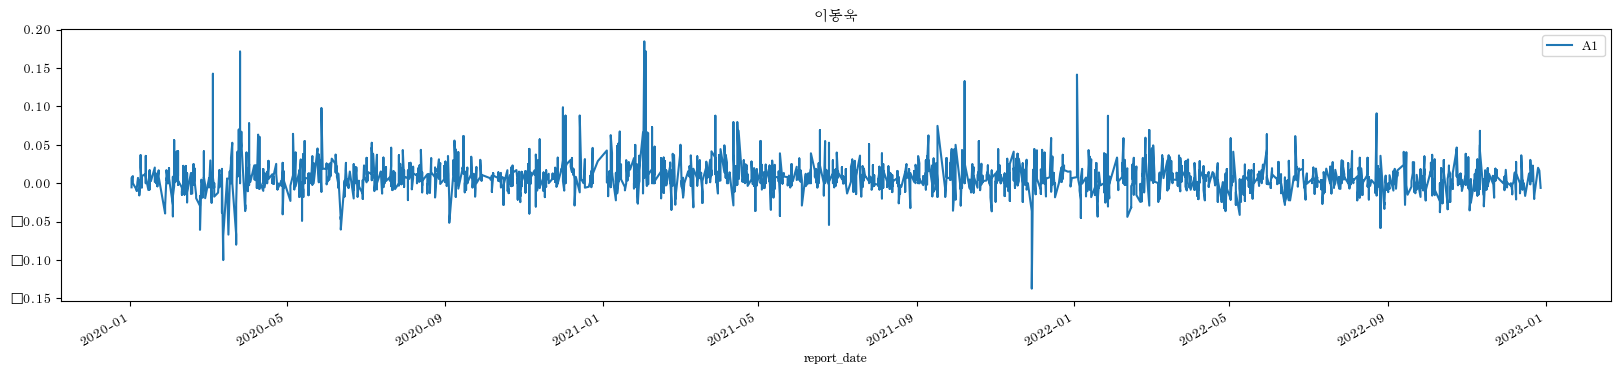

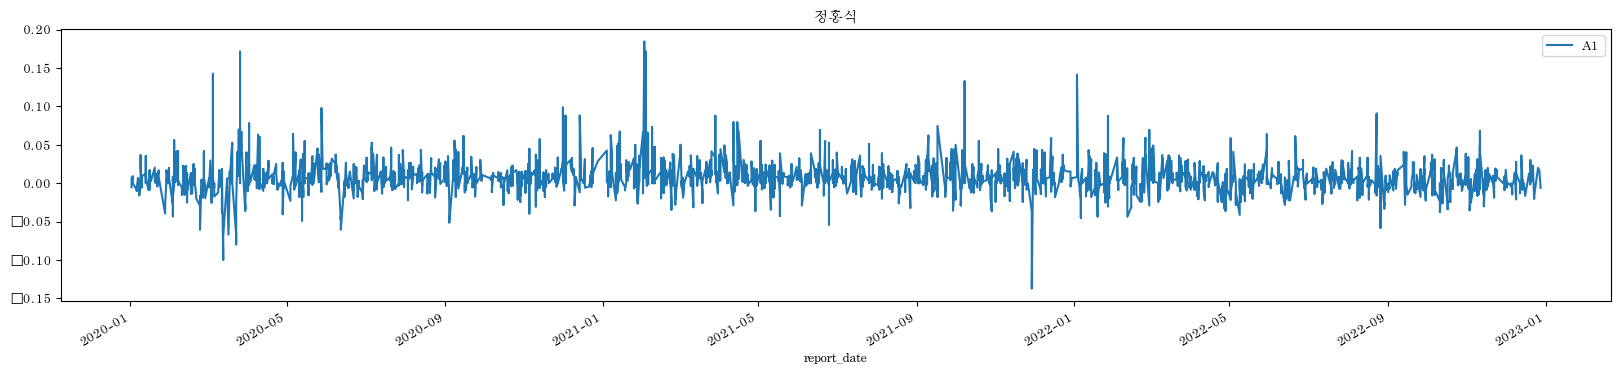

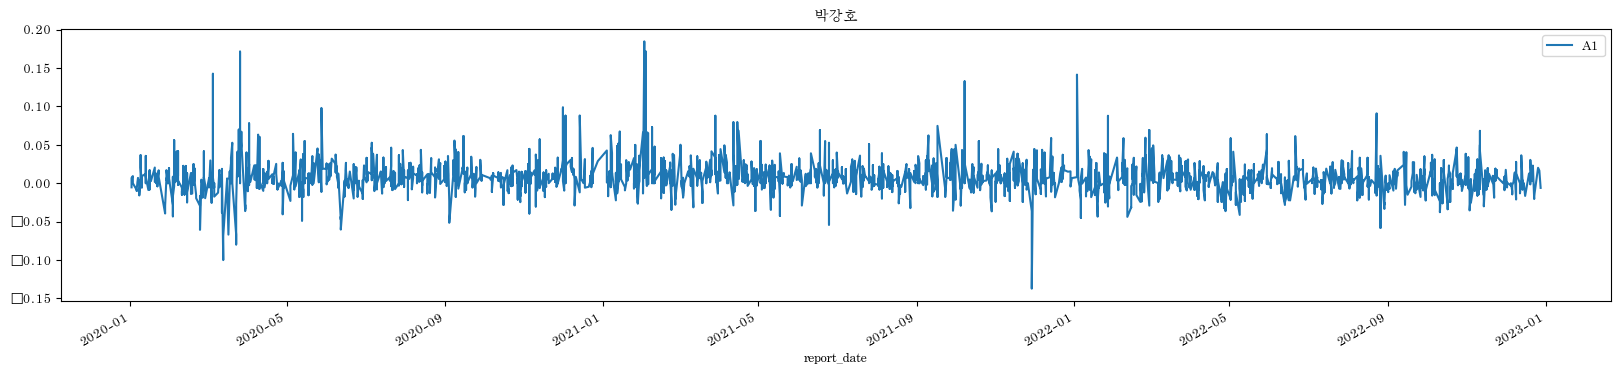

In [112]:
i = 0
for k, v in authors.items():
    by_author_df.loc[by_author_df['author'].isin([
        '박종선', '김장열', '김현용', '성종화', '하태기', '김경민', '김지산', '김동원', '이동욱', '정홍식', '박강호', '박종렬'])
                    ].set_index('report_date')[['A1']].plot(title=k, figsize=(20,4))
    i += 1
    if i > 10:
        break

In [97]:
compare_df.pivot(columns='author', index='report_date')

ValueError: Index contains duplicate entries, cannot reshape